# Overview 

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

1.) Has the network latency gone up since we switched internet service providers?
- $H_0$: the network latency is the same since the ISP switch.
- $H_A$: Network latency has increased since our ISP switch. 
  - True Positive: We reject the Null Hypothesis, our latency has increased by 200 ms since switching ISP. 
  - True Negative: There is not a noticeable, statistically significant difference in latency. We fail to reject the Null Hypothesis. 
- False Positive(Type I Error): We reject the Null hypothesis, but perhaps our tests were conducted while using far less demanding applications than usual, or the data in the sample is biased. 
- False Negative(Type II Error): We fail to reject the Null Hypothesis, our data may have been recorded when far more demanding applications and streaming were at play. 

***
2.) Is the website redesign any good?
- $H_0$: Our redesign has not led to any more click traffic.
- $H_A$: Our redesign has increased web traffic and gathered more clicks. 
    - True Positive: After rejecting the Null Hypothesis, we confirmed the redesign truly helped increase site traffic. 
    - True Negative: We failed to reject the Null Hypothesis, the redesign did not increase site traffic, and there's no indication that this is biased or based in errorneous data. 
- False Positive(Type I Error): We rejected the Null Hypothesis, but it turns out that only previous visitors have been visiting our website more, perhaps to laugh at how terrible the redesign actually is. 
- False Negative(Type II Error): We failed to reject the Null and concluded the redesign didn't help, but perhaps it did, as maybe our site traffic checker was malfunctioning or we were only sampling from competitors who gave terrible feedback. 
***
3.) Is our television ad driving more sales?
- $H_0$: Our Television Ad for the Cinco Brand Poop-Chute has not increased sales. 
- $H_A$: Our Television Ad for the Cinco Brand Poop-Chute has heavily decreased our sales. 
    - True Positive: We rejected the null, and the increased sales are speaking for themselves. 
    - True Negative: We failed to reject the null, and our plummiting sales speak for themselves. 
- False Positive(Type I Error): We rejected the null, but our customers are only buying our product ironically and then returning it. 
- False Negative(Type II Error): We failed to reject the null, but online it seems our product is a hit and that many orders are pending in our systems. 

# T-Test

__Ace Realty__ wants to determine whether the average time it takes to sell homes is different for its two offices.    
- A sample of 40 sales from office #1 revealed:
  - a mean of 90 days,
  - a standard deviation of 15 days.    
 ***
- A sample of 50 sales from office #2 revealed:
  - a mean of 100 days,
  - a standard deviation of 20 days.  
***
Use a .05 level of significance.

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from scipy import stats
from pydataset import data

import env

𝐻0, the null hypothesis: Mean time for sells in Ace Realty's First Office = Mean time for sells in their Second Office

𝐻𝑎, the alternative hypothesis: Mean time for sells in Ace Realty's First Office = Mean time for sells in their Second Office

In [2]:
# lets make some variables. 

null_hypothesis = 'Mean time for sells in Ace Realty\'s First Office = Mean time for sells in their Second Office'

confidence_level = 95
significance_level = alpha = .05
critical_value = critical_probability = 1 - (alpha / 2) # .975

n1, n2 = 40, 50 # number of members(sales) in the sample set
x̅_office_1, x̅_office_2 = 90, 100 # mean
s1, s2 = 15, 20 # standard deviation

# standard deviation is the square-root of variance. 
# Therefore to convert standard standard deviation to variance, square the standard deviation.
variance1, variance2 = 15**2, 20**2
# print(variance1, variance2)
# the variances are not equal. 
# if I were using stats.ttest_ind, I would be setting the argument of equal_var to False.

# the same also goes for stats.ttest_ind_from_stats, accorind to scipy docs. 
# two-sided is the default argument for the alternative hypothese, wherein the means are unequal. 


# so here the goal is to compare two observed means(independent samples), from this array-like
# sample set. So, as a parametric test, I will run an independent t-test:scipy.stats.ttest_ind
# we have a large enough set, in accordance with the Central Limit Theorem, to proceed
# without scaling via the Gaussian Scalar method. 


t, p = stats.ttest_ind_from_stats(x̅_office_1, s1, n1, x̅_office_2, s2, n2, equal_var=False)

one_tailed_p = p / 2
# print(one_tailed_p)
# print(f' Our p-value is less than alpha: {one_tailed_p < alpha}')
print(f'''
The one-tailed test demonstrates the p-value ({one_tailed_p:.02}) is lower than the alpha {alpha}, 
errgo the Null Hypothesis ({null_hypothesis}) is rejected.''')



The one-tailed test demonstrates the p-value (0.0041) is lower than the alpha 0.05, 
errgo the Null Hypothesis (Mean time for sells in Ace Realty's First Office = Mean time for sells in their Second Office) is rejected.


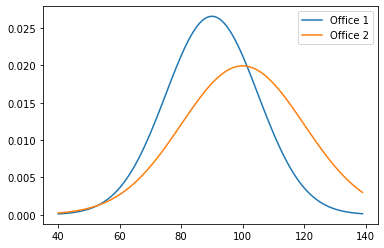

In [3]:
# x = np.arange(0,100) # 0, 100 cut it off too soon. Irrelevant until around 40. 
x = np.arange(40,140)

y1 = stats.norm(x̅_office_1, s1).pdf(x)
y2 = stats.norm(x̅_office_2, s2).pdf(x)


plt.plot(x, y1, label = 'Office 1')
plt.plot(x, y2, label = 'Office 2')

plt.legend()

 #### notes taken as comments while I was solving this, moved into markdown 
 The p-value is the chance that we obtained the results we did
 (or would obtain more extreme results) due to chance if the null hypothesis is true.
 The tail refers to the end of the distribution of the test statistic for the particular
 analysis that you are conducting. For example, a t-test uses the t distribution, and an analysis
 of variance (ANOVA) uses the F distribution. The distribution of the test statistic can have one
 or two tails depending on its shape. The black-shaded areas of the distributions in the figure
 are the tails. Symmetrical distributions like the t and z distributions have two tails. 

 Two tailed tests are appropriate to determine if there is any difference between the groups
 being compared. A two tailed test uses both the postive and negative tails of the distribution.
 however, here, if we are looking at sales relative to time, there shouldn't be negative values. 

 "When in doubt, it is almost always more appropriate to use a two-tailed test.
 A one-tailed test is only justified if you have a specific prediction about the direction
 of the difference (e.g., Group A scoring higher than Group B), and you are completely 
 uninterested in the possibility that the opposite outcome could be true (e.g., Group A
 scoring lower than Group B)."

 If the p-value is higher than your alpha, I fail to reject the Null Hypothesis.
 If the p-value is lower than the alpha, I reject the Null Hypothesis.

 comments galore: there are two main approaches for making the conclusion of a hypothesis test. 
 the critical value approach compares the test statistic with the critical value of the significance level
    the p value approach compares the p-value of the test statistics with the significance level. 
 critical value (p*) = 1 - alpha/2 
You can express the critical value in two ways: as a Z-score related to cumulative probability
 and as a critical t statistic, which is equal to the critical probability. useful when the standard deviation is unknown. 

 as I get deeper into this, I am seeing the prospects of using t or z tests excessive and ridiculous. 
 I still don't understand when to use the one_tail versus two_tail. But for now, I will just use the former. 
 print(t)
 print(p)
 
 The H 0 null hypothesis is always framed as:
There's no significant difference between continuous variables of 2 subgroups (two-tailed t-test) There's no significant difference between the continuous variaable of a subgroup and its population (one tailed t-test) There's no linear relationship between two continuous variables (correlation) There's no dependence between two categorical variables (chi-squared)

#### scipy.stats.ttest_ind_from_stats
scipy.stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True, alternative='two-sided')[source]       
 
T-test for means of two independent samples from descriptive statistics.       

This is a test for the null hypothesis that two independent samples have identical average (expected) values.

# MPG DATASET

Load the __mpg dataset__ and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?    
***
- Are compact cars more fuel-efficient than the average car?
***
- Do manual cars get better gas mileage than automatic cars?

In [5]:
mpg = pydataset.data('mpg')


### _Is there a difference in fuel-efficiency in cars from 2008 vs 1999?_

In [6]:
# harmonic mean. 
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)
mpg.head()
# separate the independent groups:
 # mpg data set where the year is 2008, specifying the average fuel efficiency column 
fe_2008 = mpg[mpg.year == 2008].avg_fe

# same, but with the 1999 year. 
fe_1999 = mpg[mpg.year == 1999].avg_fe

In [7]:
fe_2008.var(), fe_1999.var()
fe_2008.count(), fe_1999.count()

(117, 117)

In [8]:
# stats Levene test - returns p value. small p-value means unequal variances
stats.levene(fe_2008, fe_1999)

t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

# p is significantly greater than alpha, so we have not rejected the null hypothesis. 

(-0.3011962975077886, 0.7635345888327115)

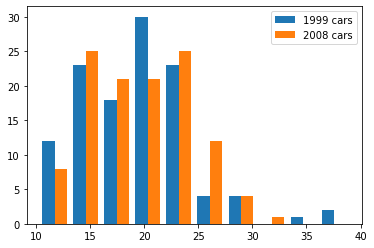

In [9]:
plt.hist([fe_1999, fe_2008], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

### _Are compact cars more fuel-efficient than the average car?_

H0: There is no difference in fuel-efficiency between compact cars and the population average fuel-efficiency 
Ha: Compact cars are more fuel efficient than the average car 
for ha to be true t >0 and p/2 > 0.05


In [10]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
mu = mpg.avg_fe.mean()

t, p = stats.ttest_1samp(fe_compact, mu)
print('t=', t)
print('p=', p)

print(f'''
Since p/2 ({p/2:.15f}) < alpha (.05), we reject the null hypothesis.''')

t= 7.512360093161354
p= 1.5617666348807727e-09

Since p/2 (0.000000000780883) < alpha (.05), we reject the null hypothesis.


### _Do manual cars get better gas milage than automatic cars?_

- $H_0$: There is no difference in mileage between automatic and manual cars. 
- $H_a$: There is a significant difference in mileage between automatic and manual cars. 

In [11]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

In [12]:
fe_auto.var(), fe_manual.var()


(20.428279095002054, 25.665633639828275)

In [13]:
stats.levene(fe_auto, fe_manual)
# high P value, can't assert a difference in variance. 

#parameter review: 
# roughly normal (sample size, CLT), equal varainces via levene tests, independent sample

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [14]:
t, p = stats.ttest_ind(fe_auto, fe_manual)
print('t=', t, 'p=', p/2, alpha)

t= -4.652577547151351 p= 2.7552323050220026e-06 0.05


In [15]:
print(f'''
Since p ({p:.5f}) < alpha (.05), we reject the null hypothesis that there
is no difference in gas mileage between manual and automatic cars.
''')


Since p (0.00001) < alpha (.05), we reject the null hypothesis that there
is no difference in gas mileage between manual and automatic cars.



# Correlation Exercises

1.) Use the telco_churn data.     
- Does tenure correlate with monthly charges?
- Total charges? 
- What happens if you control for phone and internet service?

In [29]:
telco_churn = pd.read_csv('/Users/nicholasdougherty/codeup-data-science/statistics-exercises/CustDetails.csv')
churn_data = df = pd.DataFrame(telco_churn)
churn_data.head()
# Ready to explore and clean. 

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,phone_service_name,internet_service,internet_service_name,contract_type,...,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,partner_dependents.1,service_type,tenure_months,tenure_years
0,1371-DWPAZ,Female,0,Yes,Yes,0,No Phone Service,1,DSL,2,...,True,False,False,True,False,3,3,Internet,0,< 1 year
1,2520-SGTTA,Female,0,Yes,Yes,1,One Line,0,No Internet Service,2,...,True,False,True,False,False,3,3,Phone,0,< 1 year
2,2775-SEFEE,Male,0,No,Yes,2,Two or More Lines,1,DSL,2,...,False,False,True,True,True,2,2,Phone and Internet,0,< 1 year
3,2923-ARZLG,Male,0,Yes,Yes,1,One Line,0,No Internet Service,1,...,False,False,True,False,False,3,3,Phone,0,< 1 year
4,3115-CZMZD,Male,0,No,Yes,1,One Line,0,No Internet Service,2,...,False,False,True,False,False,2,2,Phone,0,< 1 year


In [87]:
def describe_data(df):
    print(df.isna().sum())
    print(df.info())
    print(df.describe())
    print(df.head())
    return print('End')

describe_data(churn_data)
# since I have 11 na's in total charges, I'll drop those. 

customer_id                0
gender                     0
is_senior_citizen          0
partner                    0
dependents                 0
phone_service              0
phone_service_name         0
internet_service           0
internet_service_name      0
contract_type              0
contract_name              0
payment_type               0
monthly_charges            0
total_charges             11
tenure                     0
total_charges2             0
total_charges_match        0
churn                      0
is_female                  0
has_churned                0
has_phone                  0
has_internet               0
has_phone_and_internet     0
partner_dependents         0
partner_dependents.1       0
service_type               0
tenure_months              0
tenure_years               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------    

In [18]:
churn_data.dropna(axis=0, how='any', subset=['total_charges'])
#nchurn_data.isna().sum()
# doesn't appear to work. The sum for total charges is 11. moving on for now.

def missing_values_percentage(df): 
    rows, columns = churn_data.shape
    cell_count = rows * columns
    number_of_nulls = churn_data.isnull().sum().sum()
    percentage_of_missing = (number_of_nulls / cell_count) * 100
    print(f'Percentage of missing values: {percentage_of_missing}%')

# the impact of the NaN's as far as I can guess, is negligible at best. 

# I was wrong, even though the percentage is low, it still interfered with my test.
# so I will change it without dropping it, and instead via replacement with 0. 

# df['total_charges'] = (df['total_charges'] + '0').astype(float)
# ufunc 'add' did not contain a loop with signature matching types 
# (dtype('<U32'), dtype('<U32')) -> dtype('<U32')
# failing to change the type, still. Sigh, I'll just set it to greater than zero in the function. 

1a.) Does tenure correlate with monthly charges?

- $H_0$: Tenure does not have a linear relationship with monthly charges. 
- $H_a$: Tenure has a linear relationship with monthly charges. 

r = 0.2472032380467264
p = 1.2381721068052338e-98
p is less than our alpha so we can reject the null hypothesis.


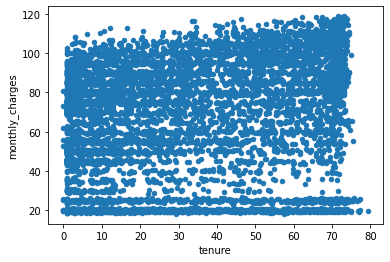

In [19]:
# column names #12 monthly_charges(float64), #14 tenure(float64), #26 tenure_months(int64)
churn_data.plot.scatter(x='tenure', y='monthly_charges')
y = churn_data.monthly_charges
x = churn_data.tenure

r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

p < .05

print('p is less than our alpha so we can reject the null hypothesis.')

1b.) Does tenure correlate with total charges?
- $H_0$: Tenure has no correlation with total charges.  
- $H_a$: Tenure correlates with total charges.

In [20]:
r, p = stats.pearsonr(df[df.total_charges > 0].tenure, df[df.total_charges > 0].total_charges)
print(f'r =', r)
print('p =', p)
      
p < .05

print('p is less than our alpha so we can reject the null hypothesis.')

r = 0.8258274352556665
p = 0.0
p is less than our alpha so we can reject the null hypothesis.


1c.) What happens if you control for phone and internet service?

- $H_0$: Controlling for phone and internet service has no impact on monthly charges and tenure. 
- $H_a$: Controlling for phone and internet service has an impact on monthly charges and tenure. 

Uses Phone and Internet

Pearson Correlation is calculated at 0.44355674344469 with a p value of 0.00000000000000
 p is less than our alpha and we can reject the null hypothesis

----------------------------------

Does Not Use Phone and Internet

Pearson Correlation is calculated at 0.23651525976100 with a p value of 0.00000000000000
 p is less than our alpha and we can reject the null hypothesis


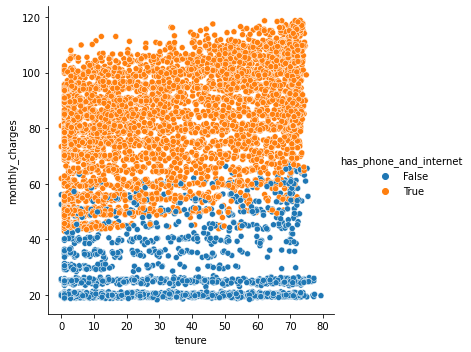

In [21]:
sns.relplot(x='tenure', y='monthly_charges', hue='has_phone_and_internet', data=df)
#sns.relplot(x='tenure', y='monthly_charges', hue='service_type', data=df)
#sns.relplot(x='tenure', y='monthly_charges', hue='internet_service_name', data=df)
#sns.relplot(x='tenure', y='total_charges', hue='has_phone_and_internet', data=df)
#sns.relplot(x='tenure', y='total_charges', hue='service_type', data=df)
#sns.relplot(x='tenure', y='total_charges', hue='internet_service_name', data=df)

phone_and_internet = df[df.has_phone_and_internet == True]
phone_and_internet
no_phone_and_internet = df[df.has_phone_and_internet == False]
no_phone_and_internet 
r, p = stats.pearsonr(phone_and_internet.tenure, phone_and_internet.monthly_charges)

print('Uses Phone and Internet')
print('')

print(f'Pearson Correlation is calculated at {r:.14f} with a p value of {p:.14f}')
if p < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')
    
print('')
print('----------------------------------')
print('')

r2, p2 = stats.pearsonr(no_phone_and_internet.tenure, no_phone_and_internet.monthly_charges)

print('Does Not Use Phone and Internet')
print('')
print(f'Pearson Correlation is calculated at {r2:.14f} with a p value of {p2:.14f}')
if p2 < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')
    
# 
# Fun fact, before I kept trying df[df.has_phone_and_internet == 'True']
# essentially evaluating based on a string that didn't exist. so no rows were returning. 
# The same was happening for the two following attempts. 
#I NEED to get into the habit of checking variables right after creating them. 


In [115]:
# PREVIOUS ATTEMPTS TO BE IGNORED. 
# phone = df[df.phone_service == 1]
# r, p = stats.pearsonr(phone.tenure, phone.monthly_charges)
# print('Has Phone Service')
# print('   r =', r)
# print('   p =', p)
# #      same error, so it's not because it was a boolean. Time to get experimental. 
# 
# # sets x's for those with phone service. 
# x_phone_t = df['tenure'][df['has_phone'] == True]
# x_phone_tc = df['total_charges'][df['has_phone'] == True]
# 
# # set y for phone service. 
# y_phone_mc = df['monthly_charges'][df['has_phone'] == True]
# 
# # now for those who don't have phone service. 
# # x's
# x_nophone_t = df['tenure'][df['has_phone'] == 'False']
# x_nophone_tc = df['total_charges'][df['has_phone'] == True]
# 
# #y
# y_nophone_mc = df['monthly_charges'][df['has_phone'] == True]

### 2.) Use the employees database.    
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [51]:
from env import get_db_url
url = get_db_url('employees')
# pd.read_sql("Select * FROM employees", url)
# connection established. 

In [55]:
def correlation_exploration(df, x_string, y_string):
    '''
    This nifty function takes in a df, a string for x variable,
    and a string for y variable and displays their correlation.
    '''
    r, p = stats.pearsonr(df[x_string], df[y_string])
    df.plot.scatter(x_string, y_string)
    plt.title(f"{x_string}'s Relationship with {y_string}")
    print(f'The p-value is: {p}. There is {round(p,3)}% chance that we see these results by chance.')
    print(f'r = {round(r, 2)}')
    plt.show()

In [8]:
# query = 'SELECT * FROM employees'
# query_2 = 'SELECT * FROM salaries'
# query_3 = 'SELECT * FROM titles'
# 
# employees = pd.read_sql(query, url)
# salaries = pd.read_sql(query_2, url)
# titles = pd.read_sql(query_3, url)
# I am going to combine elements from some of these. 

In [49]:
# employees.head()
# salaries.head()
# titles.head()

In [61]:
query = '''
SELECT
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    s.salary AS salary
FROM employees e
JOIN salaries s USING (emp_no)
WHERE s.to_date > NOW()
'''

employees_with_salaries = pd.read_sql(query, url)

# sql = '''
# SELECT emp_no, COUNT(title) AS n_titles
#   FROM titles
#   WHERE emp_no IN (SELECT emp_no
#                      FROM salaries
#                      WHERE to_date = '9999-01-01')
#   GROUP BY emp_no;
# '''
# titles = pd.read_sql(sql, url)
query_t = '''
SELECT
    e.emp_no,
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    n_titles
FROM employees e
JOIN (
    SELECT emp_no, COUNT(*) as n_titles
    FROM employees e
    JOIN titles t USING (emp_no)
    GROUP BY emp_no
) emp_title_count USING (emp_no)
'''

titles = pd.read_sql(query_t, url)

2a.) Is there a relationship between how long an employee has been with the company and their salary?

- $H_0$: There is no linear relationship between employee tenure and their salary. 
- $H_a$: There is a linear relationship between employee tenure and their salary. 


The p-value is: 0.0. There is 0.0% chance that we see these results by chance.
r = 0.31


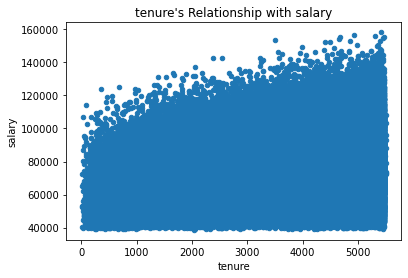

In [59]:
# stats.pearsonr(employees_with_salaries.tenure, employees_with_salaries.salary)
correlation_exploration(employees_with_salaries, 'tenure', 'salary')

2b.) Is there a relationship between how long an employee has been with the company and the number of titles they have had?

- $H_0$: There is no relationship between tenure and number of titles an employee has held. 
- $H_a$: There is a relationship between tenure and number of titles an employee has held. 

The p-value is: 0.0. There is 0.0% chance that we see these results by chance.
r = 0.27


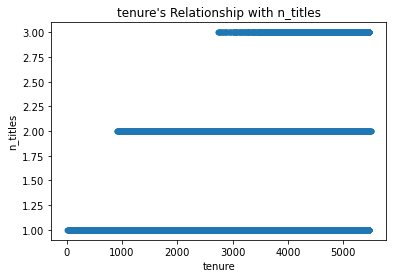

In [62]:
correlation_exploration(titles, 'tenure', 'n_titles')

### 3.) Use the sleepstudy data. 
- Is there a relationship between days and reaction time?

In [32]:
import pydataset

df = pydataset.data('sleepstudy')
describe_data(df)

Reaction    0
Days        0
Subject     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB
None
         Reaction        Days     Subject
count  180.000000  180.000000  180.000000
mean   298.507892    4.500000  341.277778
std     56.328757    2.880293   20.320905
min    194.332200    0.000000  308.000000
25%    255.375825    2.000000  331.000000
50%    288.650800    4.500000  336.000000
75%    336.752075    7.000000  352.000000
max    466.353500    9.000000  372.000000
   Reaction  Days  Subject
1  249.5600     0      308
2  258.7047     1      308
3  250.8006     2      308
4  321.4398     3      308
5  356.8519     4      308
End


- $H_0$: Number of days has no statistical bearing on reaction time. 
- $H_a$: Number of days has a positive effect on reaction time. 

In [26]:
r, p = stats.pearsonr(df['Days'], df['Reaction'])
print(f'Pearson Correlation is calculated at {r:.3f} with a p value of {p:.3f}')
if p < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')

Pearson Correlation is calculated at 0.535 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


# Chi Square Exercises

1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.


In [22]:
ct = pd.DataFrame({'Codeup Student': [49, 1], 'Not Codeup Student': [20, 30]})
ct = ct.rename(index={0: 'Uses a Macbook', 1: 'Doesn\'t Use a Macbook'})
ct.values.sum()

100

Form hypothesis:

- $H_0$: There is no association between using a Macbook and being a Codeup Student (these are independent)
- $H_a$: There is a signficant association between using a Macbook and being a Codeup Student (dependent)

In [8]:
alpha = 0.01

In [12]:
chi2, p, degf, expected = stats.chi2_contingency(ct)

print('Observed\n')
print(ct.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34 34]
 [15 15]]
---

chi^2 = 36.6526
p     = 0.0000
We reject the null


##### Alternate method to making the table. 
index = ['macbook', 'not_macbook']
columns = ['codeup', 'not_codeup']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)

 set n
n = observed.values.sum()
n

2. Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them.       
      Be sure to state your null and alternative hypotheses.

In [34]:
cars = data('mpg')
describe_data(cars)

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB
None
            displ         year         cyl         cty   

In [35]:
cars.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

In [40]:
print(cars['class'].unique())
print(cars['fl'].unique()) # not sure what fl is supposed to represent. 
print(cars['drv'].unique()) # front-wheel, four-wheel, rear-wheel drive
print(cars['cyl'].unique())
# any of these would work well for this test, I'm going to play with drv and cyl


['compact' 'midsize' 'suv' '2seater' 'minivan' 'pickup' 'subcompact']
['p' 'r' 'e' 'd' 'c']
['f' '4' 'r']
[4 6 8 5]


In [41]:
observed = pd.crosstab(cars.drv, cars.cyl)
observed

cyl,4,5,6,8
drv,,,,
4,23,0,32,48
f,58,4,43,1
r,0,0,4,21


Form hypothesis:

- $H_0$: A Car's cylinder is independent of its drive-type.
- $H_a$: A Car's cylinder depends on its drive-type. 

In [42]:
alpha = .01
chi2, p, degf, expected = stats.chi2_contingency(observed)

expected = expected.round(1)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

Observed

[[23  0 32 48]
 [58  4 43  1]
 [ 0  0  4 21]]
---
Expected

[[35.7  1.8 34.8 30.8]
 [36.7  1.8 35.8 31.7]
 [ 8.7  0.4  8.4  7.5]]
---

chi^2 = 98.1355
p     = 0.0000
We reject the null


In [48]:
print("check to make sure p isn't erroneous") 
print(f' P equals {p}')
print('All clear')

check to make sure p isn't erroneous
 P equals 6.143348809350951e-19
All clear


3. Use the data from the employees database to answer these questions:

In [69]:
def chi2_test(data_for_category1, data_for_category2, alpha=.05):

    '''
    Given two subgroups from a dataset, conducts a chi-squared test for independence and outputs 
    the relevant information to the console. 
    Utilizes the method provided in the Codeup curriculum for conducting chi-squared test using
    scipy and pandas. 
    '''
    
    # create dataframe of observed values
    observed = pd.crosstab(data_for_category1, data_for_category2)
    
    # conduct test using scipy.stats.chi2_contingency() test
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    
    # round the expected values
    expected = expected.round(1)
    
    # output
    print('Observed\n')
    print(observed.values)
    print('---\nExpected\n')
    print(expected)
    print('---\n')
    print(f'chi^2 = {chi2:.4f}')
    print(f'p     = {p:.4f}')
    
    # evaluate the hypothesis against the established alpha value
    if p < alpha:
        print('\nReject H0')
    else: 
        print('\nFail to Reject H0')

3a) Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [79]:
sql = '''
SELECT e.emp_no, e.gender, d.dept_name
  FROM employees e 
    JOIN dept_emp de USING(emp_no)
    JOIN departments d USING(dept_no)
  WHERE emp_no IN (
                   SELECT emp_no
                     FROM dept_emp
                     WHERE to_date = '9999-01-01'
                  )
                AND (d.dept_name = 'Sales'
                OR d.dept_name = 'Marketing'
                );
'''
current_emp_by_dept = pd.read_sql(sql, url)
describe_data(current_emp_by_dept)

emp_no       0
gender       0
dept_name    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58252 entries, 0 to 58251
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   emp_no     58252 non-null  int64 
 1   gender     58252 non-null  object
 2   dept_name  58252 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB
None
              emp_no
count   58252.000000
mean   254083.029939
std    161991.425374
min     10002.000000
25%     85019.250000
50%    250776.500000
75%    425365.250000
max    499992.000000
   emp_no gender  dept_name
0   24976      M  Marketing
1   24965      M  Marketing
2   24957      M  Marketing
3   24951      M  Marketing
4   24901      F  Marketing
End


- $H_0$: An employees gender is independent from whether or not they work in sales or marketing. 
- $H_a$: An employees gender is dependent upon whether or not they work in sales or marketing. 

In [80]:
chi2_test(current_emp_by_dept.gender, current_emp_by_dept.dept_name, alpha = 0.05)

Observed

[[ 6429 16698]
 [ 9823 25302]]
---
Expected

[[ 6452.3 16674.7]
 [ 9799.7 25325.3]]
---

chi^2 = 0.1855
p     = 0.6667

Fail to Reject H0


In [ ]:
current_emp_spec_depts = df[(df.dept_name == 'Sales') | (df.dept_name == 'Marketing')]

3b.) Is an employee's gender independent of whether or not they are or have been a manager?

In [86]:
query = '''
SELECT e.gender, dm.dept_no AS manager_status
FROM employees e
LEFT JOIN dept_manager dm ON dm.emp_no = e.emp_no
'''
emp_manager_gender = pd.read_sql(query, url)
describe_data(emp_manager_gender)

 Sum of NA = gender                 0
manager_status    300000
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   gender          300024 non-null  object
 1   manager_status  24 non-null      object
dtypes: object(2)
memory usage: 4.6+ MB
None
        gender manager_status
count   300024             24
unique       2              9
top          M           d004
freq    179973              4
  gender manager_status
0      M           None
1      F           None
2      M           None
3      M           None
4      M           None
End


In [96]:
# 300_000 N/As. All those who are not managers. Let's fill these in. 
emp_manager_gender.fillna(0, inplace=True)
emp_manager_gender.isna().sum()
# Fixed. 
emp_manager_gender['manager_status'] = emp_manager_gender.manager_status.apply(lambda x: x if x==0 else 1)
emp_manager_gender.manager_status.value_counts()

0    300000
1        24
Name: manager_status, dtype: int64

In [97]:
chi2_test(emp_manager_gender.manager_status, emp_manager_gender.gender, alpha = 0.05)

Observed

[[120038 179962]
 [    13     11]]
---
Expected

[[1.200414e+05 1.799586e+05]
 [9.600000e+00 1.440000e+01]]
---

chi^2 = 1.4567
p     = 0.2275

Fail to Reject H0
